# Group project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data_set = """
 1  8:07  6.57
 1 15:37 -0.39
 2  8:55  5.38
 2 16:25 -1.74
 3  9:45  5.26
 3 17:14 -1.36
 4 10:35  4.13
 4 18:00 -1.15
 5 11:28  3.48
 5 18:46 -1.61
 6 12:22  2.62
 6 19:31  0.05
 7 13:24  1.83
 7 20:16  1.01
 8  3:22  3.57
 8 21:01  0.73
 9  4:07  4.54
 9 21:46  2.17
10  4:50  3.76
10 11:58  2.88
11  5:31  3.90
11 12:56  1.92
12  6:08  4.73
12 13:45  1.74
13  6:47  5.66
13 14:25  0.79
14  7:22  5.33
14 15:00 -0.04
15  7:59  5.23
15 15:34 -1.12
16  8:34  6.67
16 16:08 -0.61
17  9:10  4.74
17 16:41 -0.93
18  9:45  4.69
18 17:12 -1.29
19 10:21  4.20
19 17:45  0.22
20 10:57  3.68
20 18:15  0.26
21 11:38  2.47
21 18:48  0.36
22 12:25  2.59
22 19:20  0.99
23  2:22  4.10
23 19:52  1.87
24  2:58  3.17
24 20:30  1.60
25  3:37  3.71
25 10:44  3.10
26  4:23  4.04
26 11:55  2.49
27  5:15  4.07
27 12:57  2.18
28  6:09  5.93
28 13:50  0.70
29  7:05  6.89
29 14:39  0.21
30  7:58  6.72
30 15:27  0.22
31  8:50  6.77
31 16:10 -1.68
32  9:40  5.77
32 16:52 -1.32
33 10:30  4.35
33 17:34 -0.73
34 11:19  4.23
34 18:12 -0.38
35 12:10  2.24
35 18:49 -0.61
36  1:32  3.45
36 19:24 -0.46
37  2:13  4.13
37 20:00  1.21
38  2:54  3.34
38  9:54  2.58
39  3:39  3.32
39 11:15  3.26
40  4:29  5.21
40 12:22  2.39
41  5:21  4.83
41 13:14  2.41
"""

In [3]:
days, times, heights = [], [], []
for line in data_set.strip().splitlines():
    parts = line.split()
    day = int(parts[0])
    hour, minute = map(int, parts[1].split(':'))
    time_decimal = hour + minute/60
    height = float(parts[2])
    days.append(day)
    times.append(time_decimal)
    heights.append(height)

day = np.array(days)
times = np.array(times)
heights = np.array(heights)

t = days + times / 24.0

def tide_model(t, a0, a1, b1, a2, b2):
    omega1 = 2 * np.pi / 0.517  # ~12.4h period = 0.517 day
    omega2 = 2 * np.pi / 1.035  # ~24.8h period = 1.035 day
    return a0 + a1*np.cos(omega1*t) + b1*np.sin(omega1*t) + a2*np.cos(omega2*t) + b2*np.sin(omega2*t)

Best-fit parameters (a0, a1, b1, a2, b2):
[ 2.384371 -1.074464 -1.93358   0.183436  0.166668]
Parameter 1-sigma uncertainties:
[0.031833 0.075368 0.040376 0.044385 0.038339]


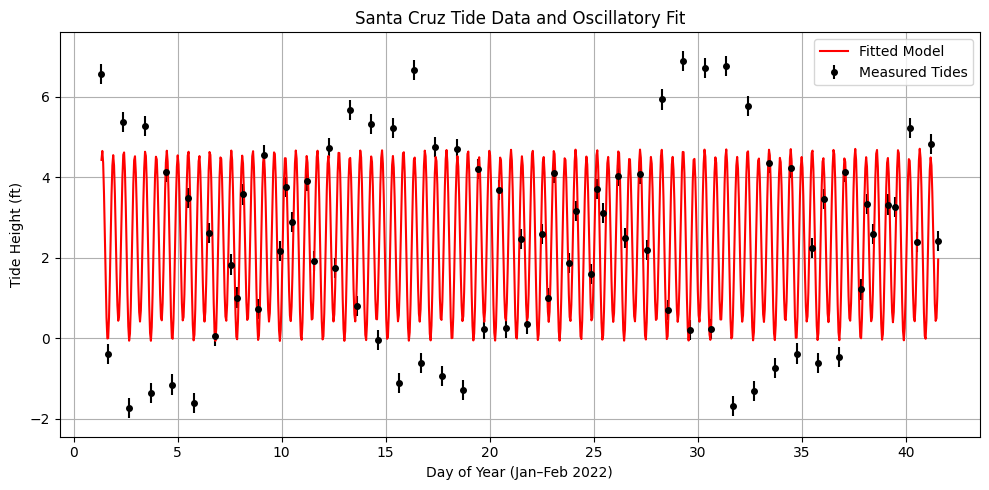

In [4]:
yerr = 0.25
popt, pcov = curve_fit(tide_model, t, heights, sigma=np.ones_like(heights)*yerr, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print("Best-fit parameters (a0, a1, b1, a2, b2):")
print(np.round(popt, 6))
print("Parameter 1-sigma uncertainties:")
print(np.round(perr, 6))

t_fit = np.linspace(min(t), max(t), 1000)
y_fit = tide_model(t_fit, *popt)

plt.figure(figsize=(10,5))
plt.errorbar(t, heights, yerr=yerr, fmt='o', color='black', markersize=4, label='Measured Tides')
plt.plot(t_fit, y_fit, color='red', label='Fitted Model')
plt.xlabel("Day of Year (Jan–Feb 2022)")
plt.ylabel("Tide Height (ft)")
plt.title("Santa Cruz Tide Data and Oscillatory Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("tide_data_and_model.pdf")
plt.show()

Residual standard deviation: 1.2559 ft
Estimated intrinsic scatter: 1.2308 ft
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


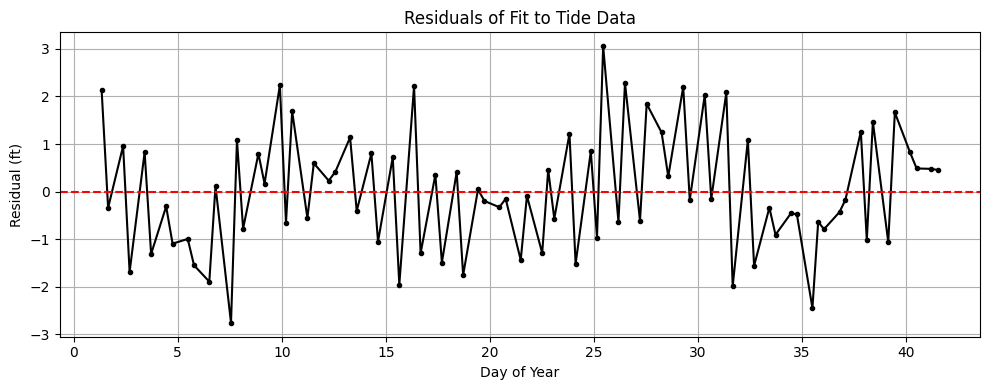

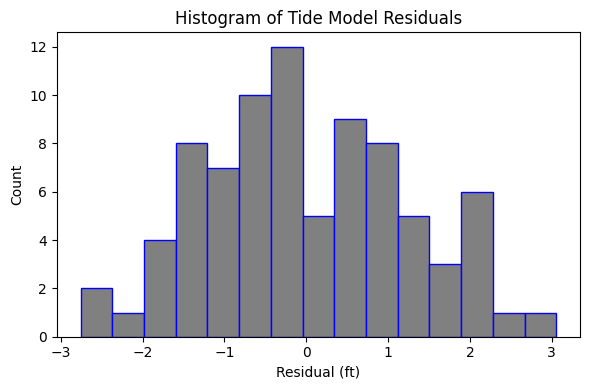

In [7]:
residuals = heights - tide_model(t, *popt)
res_std = np.std(residuals, ddof=1)

print(f"Residual standard deviation: {res_std:.4f} ft")

intrinsic_scatter = np.sqrt(max(0, res_std**2 - yerr**2))
print(f"Estimated intrinsic scatter: {intrinsic_scatter:.4f} ft")

plt.figure(figsize=(10,4))
plt.plot(t, residuals, 'ko-', markersize=3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Day of Year")
plt.ylabel("Residual (ft)")
plt.title("Residuals of Fit to Tide Data")
plt.grid(True)
plt.tight_layout()
plt.savefig("tide_residuals.pdf")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=15, color='gray', edgecolor='blue')
plt.xlabel("Residual (ft)")
plt.ylabel("Count")
plt.title("Histogram of Tide Model Residuals")
plt.tight_layout()
plt.savefig("residuals_histogram.pdf")
plt.show()

A +2.0 ft deviation corresponds to 1.59σ of the residual distribution.
Residual std including outlier: 1.2674 ft
The +2 ft outlier is 1.58σ when included.


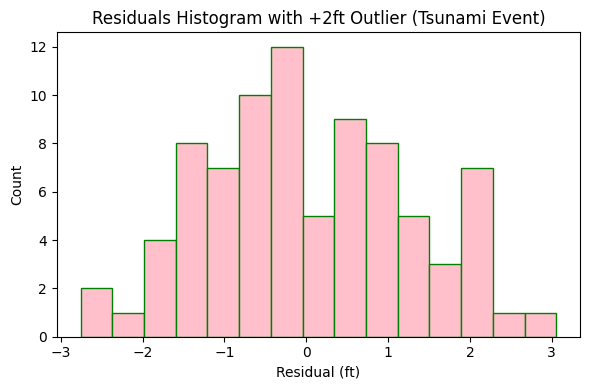

In [8]:
residuals_with_outlier = np.append(residuals, 2.0)
res_std_with_outlier = np.std(residuals_with_outlier, ddof=1)

print(f"A +2.0 ft deviation corresponds to {2.0/res_std:.2f}σ of the residual distribution.")
print(f"Residual std including outlier: {res_std_with_outlier:.4f} ft")
print(f"The +2 ft outlier is {2.0/res_std_with_outlier:.2f}σ when included.")

plt.figure(figsize=(6,4))
plt.hist(residuals_with_outlier, bins=15, color='pink', edgecolor='green')
plt.xlabel("Residual (ft)")
plt.ylabel("Count")
plt.title("Residuals Histogram with +2ft Outlier (Tsunami Event)")
plt.tight_layout()
plt.savefig("residuals_histogram_with_outlier.pdf")
plt.show()